## Цель работы
Изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

## Постановка задачи:

1. Необходимо выбрать и подготовить дата для классификации, затем построить классификационные модели с помощью пяти методов:

   a. Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);

   b. Деревья решений (Decision Tree);

   c. Линейный дискриминантный анализ (Linear Discriminant Analysis);

   d. Метод опорных векторов (Support Vector Machines);

   e. Метод ближайших соседей (k-Nearest Neighbors);

2. Затем сравните качество работы классификаторов с помощью следующих метрик:

   a. Accuracy (точность),

   b. Precision (доля правильно классифицированных положительных примеров),

   c. Recall (чувствительность, доля верно найденных положительных примеров),

   d. F1-Score (среднее гармоническое precision и recall),

   e. Площадь под кривой ROC (AUC-ROC).

3. Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

## Ход работы

### Описание датасета
Этот датасет синтетически сгенерирован для имитации метеоданных с целью задач классификации. Он включает различные метеорологические параметры и классифицирует погоду на четыре типа: Дождливая, Солнечная, Облачная и Снежная. Датасет предназначен для отработки алгоритмов классификации, предварительной обработки данных и методов выявления аномалий.

Описание параметров датасета:

Temperature (температура, числовая) Температура в градусах Цельсия, варьирующаяся от экстремально низких до экстремально высоких значений.  
Humidity (влажность, числовая) Уровень влажности в процентах, включая значения выше 100% — для симуляции аномалий.  
Wind Speed (скорость ветра, числовая) Скорость ветра в километрах в час, включая нереалистично высокие значения для тестирования устойчивости моделей.  
Precipitation (%) (осадки, числовая) Процент осадков, с намеренно включенными аномальными значениями.  
Cloud Cover (облачность, категориальная) Описание степени облачности (например, «ясно», «частично облачно», «пасмурно» и т.п.).  
Atmospheric Pressure (атмосферное давление, числовая) Атмосферное давление в гектопаскалях (гПа), охватывающее широкий диапазон значений.  
UV Index (УФ-индекс, числовая) Индекс ультрафиолетового излучения, указывающий на интенсивность УФ-излучения.  
Season (сезон, категориальная) Время года, в котором были зафиксированы данные (например, весна, лето, осень, зима).  
Visibility (km) (видимость, числовая) Видимость в километрах, включая крайне низкие или необычно высокие значения для анализа выбросов.  
Location (локация, категориальная) Тип местности, где были произведены измерения (например, город, горы, побережье, сельская местность).  
Weather Type (тип погоды, категориальная — целевая переменная) Класс, который необходимо предсказать: Rainy (дождливо), Sunny (солнечно), Cloudy (облачно), Snowy (снежно).  


Распределение классов для Weather Type:
Weather Type
Cloudy    3300
Rainy     3300
Snowy     3300
Sunny     3300
Name: count, dtype: int64


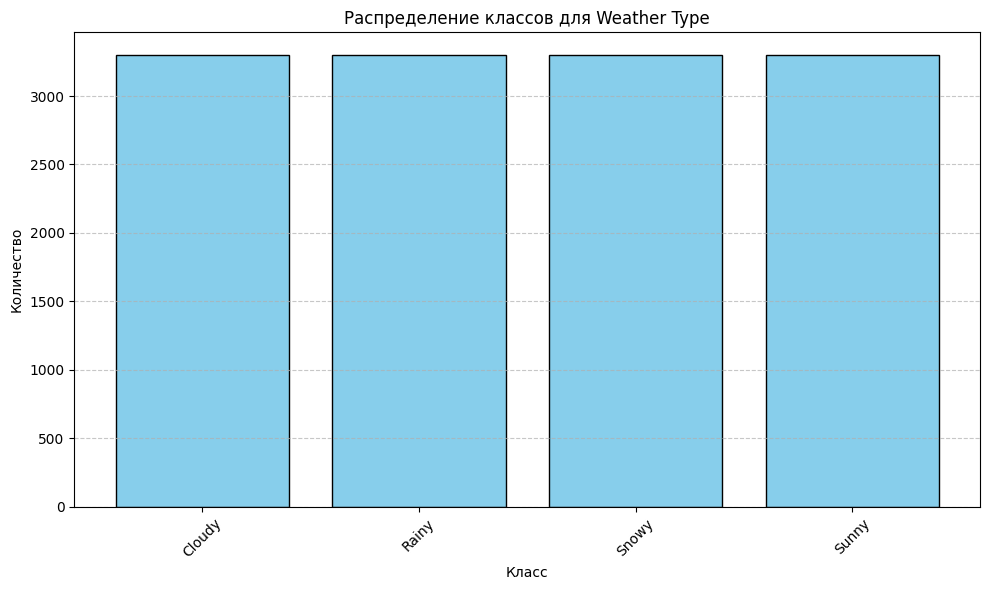

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weather_classification_data.csv')
cannabis_data = df[['Weather Type']]

class_counts = cannabis_data['Weather Type'].value_counts().sort_index()

print("Распределение классов для Weather Type:")
print(class_counts)

plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')
plt.title('Распределение классов для Weather Type')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Подготовка данных
Удалим из исходного датасета все нечисловые параметры

In [18]:
columns_to_keep = [
    'Temperature', 
    'Humidity', 
    'Wind Speed', 
    'Precipitation (%)', 
    'Atmospheric Pressure', 
    'UV Index', 
    'Visibility (km)', 
    'Weather Type'
]

df_filtered = df[columns_to_keep]

### Разбеение на тестовую и тренировочную выборки

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_filtered.drop('Weather Type', axis=1)
y = df_filtered['Weather Type']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y)

### Наивный Байесовский классификатор
Наивный байесовский классификатор (Naive Bayes classifier) — вероятностный классификатор на основе формулы Байеса со строгим (наивным) предположением о независимости признаков между собой при заданном классе, что сильно упрощает задачу классификации из-за оценки одномерных вероятностных плотностей вместо одной многомерной.

GaussianNB — это реализация Наивного Байесовского классификатора в библиотеке scikit-learn, предназначенная для непрерывных данных, где предполагается, что признаки в каждом классе распределены нормально (по закону Гаусса).  
![image.png](Gaussian.png)


=== Таблица результатов GridSearch ===
 var_smoothing  Accuracy  Precision   Recall  F1-Score  ROC AUC
  1.000000e-10  0.858658   0.861432 0.858658  0.858807 0.930900
  1.000000e-09  0.858658   0.861432 0.858658  0.858807 0.930900
  1.000000e-08  0.858658   0.861432 0.858658  0.858807 0.930900
  1.000000e-07  0.858658   0.861432 0.858658  0.858807 0.930900
  1.000000e-06  0.858658   0.861432 0.858658  0.858807 0.930900
  1.000000e-05  0.858766   0.861561 0.858766  0.858917 0.930896
  1.000000e-04  0.858766   0.861587 0.858766  0.858908 0.930845
  1.000000e-03  0.855628   0.858183 0.855628  0.855784 0.930292
  1.000000e-02  0.844048   0.846123 0.844048  0.844146 0.924622
  1.000000e-01  0.816991   0.819881 0.816991  0.816909 0.908299

=== Лучшие параметры ===
{'var_smoothing': 1e-05}

=== Метрики на тестовой выборке ===
Accuracy: 0.8636
Precision: 0.8666
Recall: 0.8636
F1-Score: 0.8640
ROC AUC: 0.9279


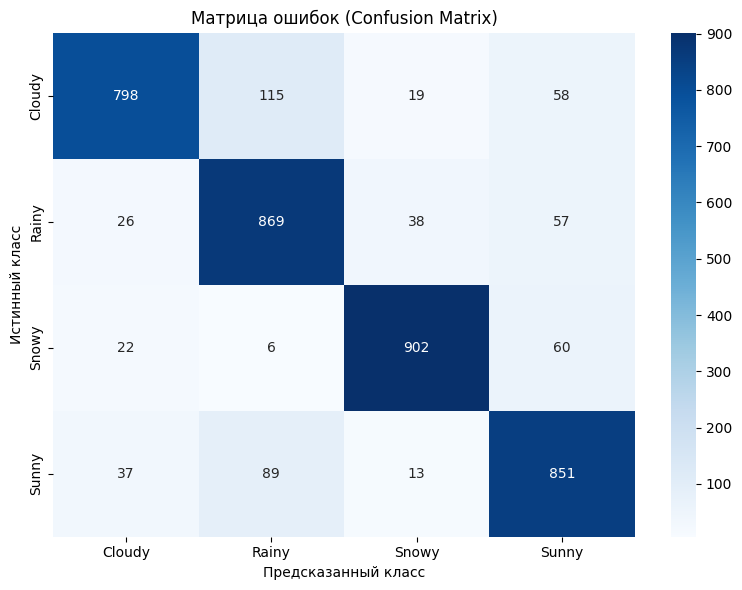


=== Classification Report ===
              precision    recall  f1-score   support

      Cloudy       0.90      0.81      0.85       990
       Rainy       0.81      0.88      0.84       990
       Snowy       0.93      0.91      0.92       990
       Sunny       0.83      0.86      0.84       990

    accuracy                           0.86      3960
   macro avg       0.87      0.86      0.86      3960
weighted avg       0.87      0.86      0.86      3960



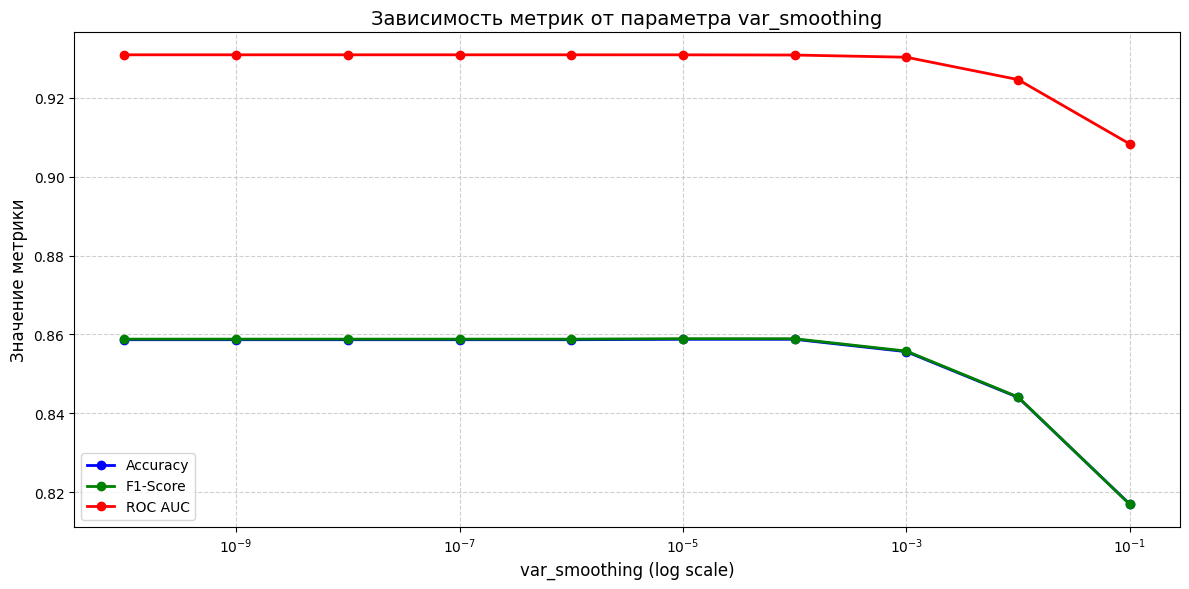

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

clf = GridSearchCV(
    GaussianNB(),
    param_grid,
    scoring={
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro',
        'roc_auc_ovr': 'roc_auc_ovr'
    },
    refit='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

clf.fit(X_train, y_train)

results_df = pd.DataFrame(clf.cv_results_)
metric_cols = [
    'param_var_smoothing',
    'mean_test_accuracy',
    'mean_test_precision_macro',
    'mean_test_recall_macro',
    'mean_test_f1_macro',
    'mean_test_roc_auc_ovr'
]
results_summary = results_df[metric_cols].copy()
results_summary.columns = [
    'var_smoothing', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'
]
results_summary = results_summary.round(11)

print("\n=== Таблица результатов GridSearch ===")
print(results_summary.to_string(index=False))

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1-Score': f1_score(y_test, y_pred, average='macro'),
    'ROC AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
}

print("\n=== Лучшие параметры ===")
print(clf.best_params_)

print("\n=== Метрики на тестовой выборке ===")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(12, 6))

metrics_to_plot = ['Accuracy', 'F1-Score', 'ROC AUC']
colors = ['blue', 'green', 'red']

for metric, color in zip(metrics_to_plot, colors):
    plt.plot(
        results_summary['var_smoothing'],
        results_summary[metric],
        marker='o',
        label=metric,
        color=color,
        linewidth=2,
        markersize=6
    )

plt.xscale('log')
plt.xlabel('var_smoothing (log scale)', fontsize=12)
plt.ylabel('Значение метрики', fontsize=12)
plt.title('Зависимость метрик от параметра var_smoothing', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

На основе получившихся значений метрик мы видим достаточно высокую общую точность распознавания(0.82 - 0.86). Матрица ошибок также это подтверждает. 

При увелечении значения гиперпараметра var_smoothing у нас наблюдается незначительный падение для точности и f1. Наилучшии метрики мы получаем при значение var_smoothing = 0.00001.

### Дерево решений
Дерево решений — это простой и интерпретируемый алгоритм машинного обучения, который делит данные на основе последовательных вопросов (правил), похожих на дерево с корнем и ветвями.

Каждый внутренний узел представляет собой проверку одного признака,
каждая ветвь — ответ («да»/«нет»),
а каждый лиственный узел — предсказанный класс.

Дерево строится жадно: на каждом шаге выбирается признак и порог, которые наиболее эффективно разделяют данные по классам.

Таблица метрик для всех комбинаций гиперпараметров:
     max_depth  min_samples_split  min_samples_leaf criterion  accuracy  \
0            3                  2                 1      gini  0.858838   
1            3                  2                 1   entropy  0.850000   
2            3                  2                 2      gini  0.858838   
3            3                  2                 2   entropy  0.850000   
4            3                  2                 4      gini  0.858838   
..         ...                ...               ...       ...       ...   
121         20                 10                 1   entropy  0.899747   
122         20                 10                 2      gini  0.897222   
123         20                 10                 2   entropy  0.900000   
124         20                 10                 4      gini  0.895707   
125         20                 10                 4   entropy  0.902273   

     precision    recall  f1_score   auc_roc  


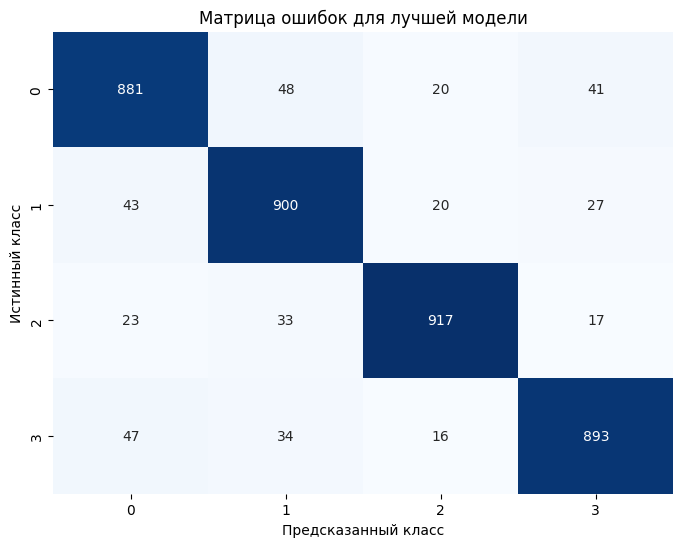

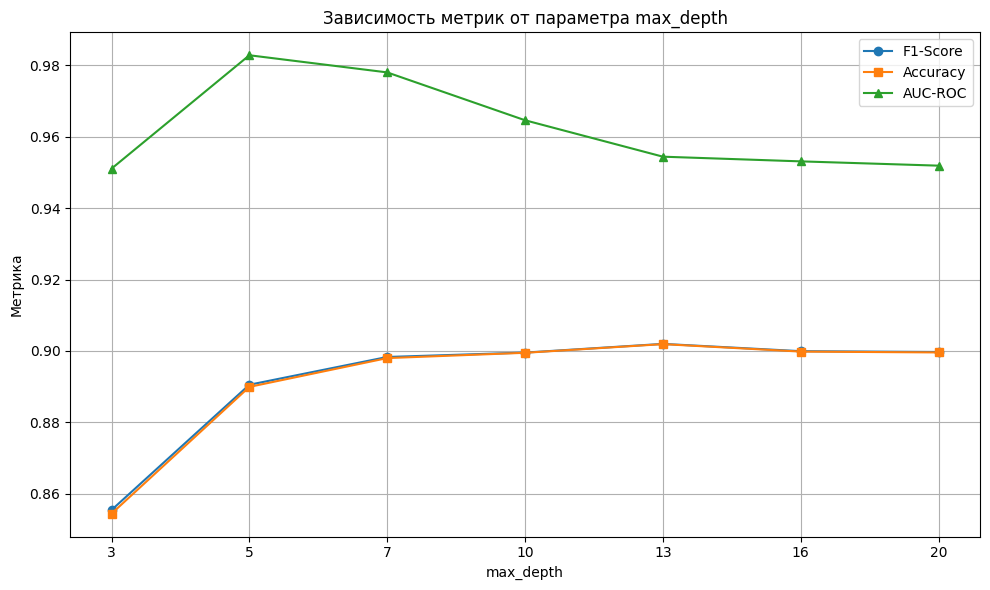

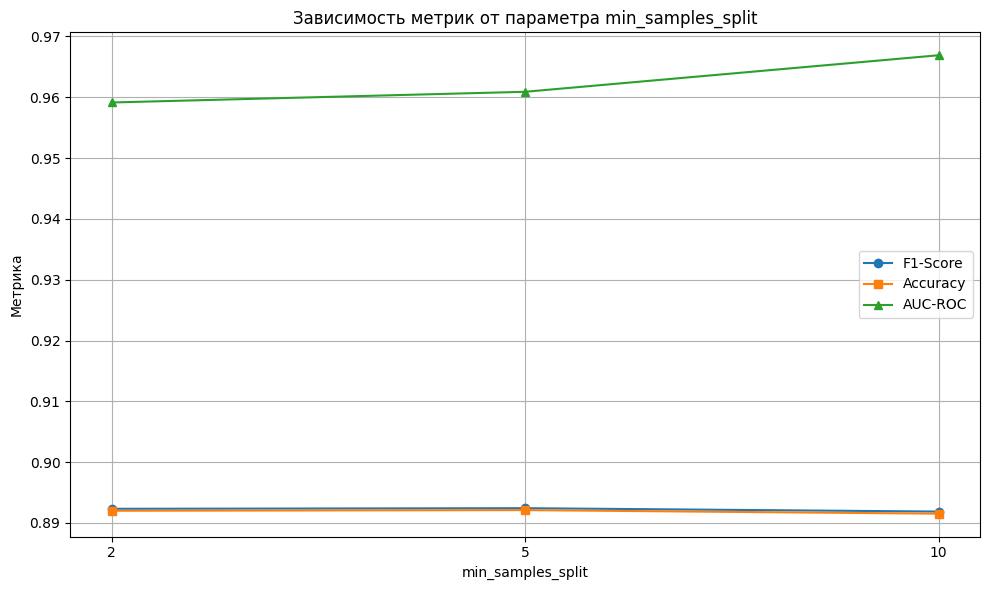

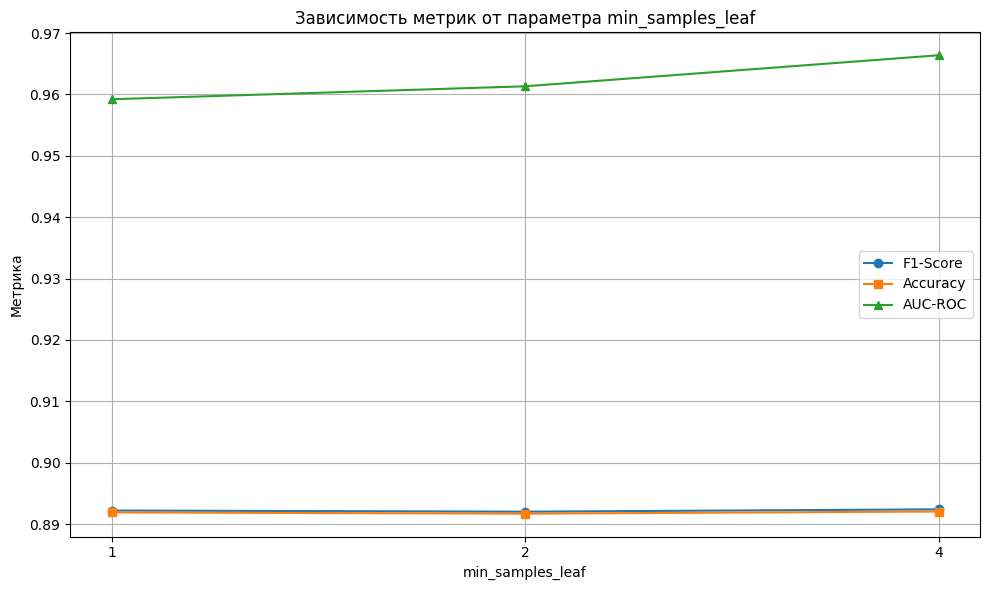

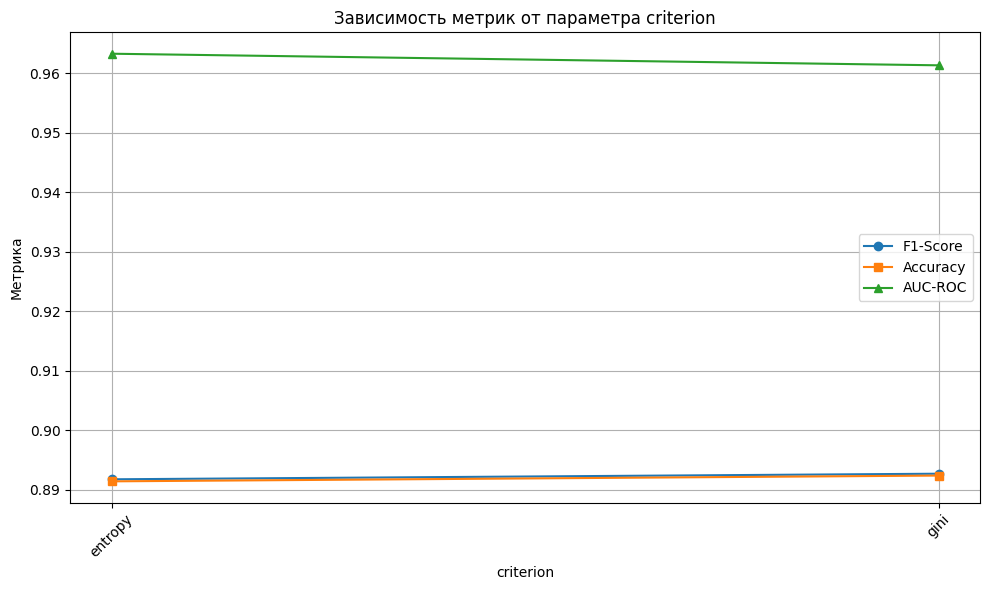

In [21]:
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

# Параметры для перебора
param_grid = {
    'max_depth': [3, 5, 7, 10, 13, 16, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

results = []

for params in product(*[param_grid[key] for key in param_grid]):
    param_dict = dict(zip(param_grid.keys(), params))
    
    clf = DecisionTreeClassifier(**param_dict, random_state=41)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    try:
        auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except ValueError:
        auc_roc = float('nan')

    results.append({
        **param_dict,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    })

results_df = pd.DataFrame(results)

print("Таблица метрик для всех комбинаций гиперпараметров:")
print(results_df)

best_idx = results_df['f1_score'].idxmax()
best_result = results_df.iloc[best_idx]
print("\nЛучший результат:")
print(best_result.to_dict())

best_params = {key: best_result[key] for key in param_grid.keys()}

best_clf = DecisionTreeClassifier(**best_params, random_state=41)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок для лучшей модели')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

for param_name in param_grid.keys():
    plt.figure(figsize=(10, 6))
    
    grouped = results_df.groupby(param_name).agg({
        'accuracy': 'mean',
        'precision': 'mean',
        'recall': 'mean',
        'f1_score': 'mean',
        'auc_roc': 'mean'
    }).reset_index()
    
    x_vals = grouped[param_name].astype(str)
    
    plt.plot(x_vals, grouped['f1_score'], label='F1-Score', marker='o')
    plt.plot(x_vals, grouped['accuracy'], label='Accuracy', marker='s')
    plt.plot(x_vals, grouped['auc_roc'], label='AUC-ROC', marker='^')
    
    plt.title(f'Зависимость метрик от параметра {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Метрика')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45 if param_name in ['criterion'] else 0)
    plt.tight_layout()
    plt.show()

На основе получившегося значения мы видим , что при увелечении max_depth у нас увеличивается точность, но при max_depth > 5 начинает падать значение площади под ROC - кривой, что говорит об ухудшение качества распознавания. При изменение критерия почти ничего не меняется. При увелечение min_samples_split, min_samples_leaf увеличивается площадь под ROC-кривой, что может говорить об улучшение качества распознавания.

### Линейный дискриминантный анализ
Линейный дискриминантный анализ (Linear Discriminant Analysis или LDA) — алгоритм классификации и понижения размерности, позволяющий производить разделение классов наилучшим образом. Основная идея LDA заключается в предположении о многомерном нормальном распределении признаков внутри классов и поиске их линейного преобразования, которое максимизирует межклассовую дисперсию и минимизирует внутриклассовую. Другими словами, объекты разных классов должны иметь нормальное распределение и располагаться как можно дальше друг от друга, а одного класса — как можно ближе.
![image](LDA.png) 


=== Результаты GridSearch для LDA ===
Solver Shrinkage  Accuracy  Precision   Recall  F1-Score  ROC AUC
   svd       NaN  0.855087   0.855448 0.855087  0.854773 0.935543
  lsqr      None  0.855087   0.855448 0.855087  0.854773 0.935543
  lsqr      auto  0.854870   0.855240 0.854870  0.854554 0.935545
  lsqr    0.0001  0.854978   0.855352 0.854978  0.854664 0.935545
  lsqr  0.000316  0.854978   0.855394 0.854978  0.854658 0.935543
  lsqr     0.001  0.854329   0.854765 0.854329  0.853995 0.935542
  lsqr  0.003162  0.853139   0.853810 0.853139  0.852803 0.935437
  lsqr      0.01  0.850108   0.851463 0.850108  0.849790 0.934356
  lsqr  0.031623  0.839827   0.842379 0.839827  0.839347 0.929283
  lsqr       0.1  0.821320   0.824012 0.821320  0.820383 0.919291
  lsqr  0.316228  0.801840   0.803773 0.801840  0.799935 0.907384
  lsqr       1.0  0.777056   0.782687 0.777056  0.771679 0.880555
 eigen      None  0.855087   0.855448 0.855087  0.854773 0.935543
 eigen      auto  0.854870   0.855240

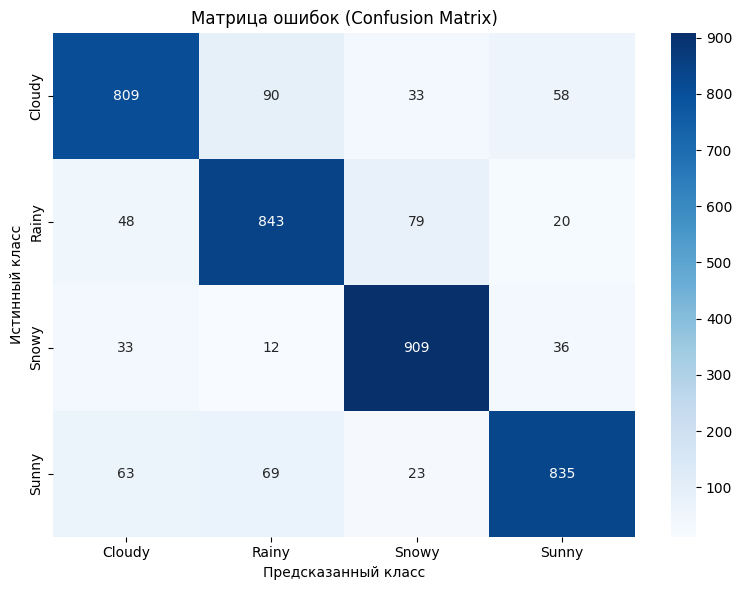


=== Classification Report ===
              precision    recall  f1-score   support

      Cloudy       0.85      0.82      0.83       990
       Rainy       0.83      0.85      0.84       990
       Snowy       0.87      0.92      0.89       990
       Sunny       0.88      0.84      0.86       990

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



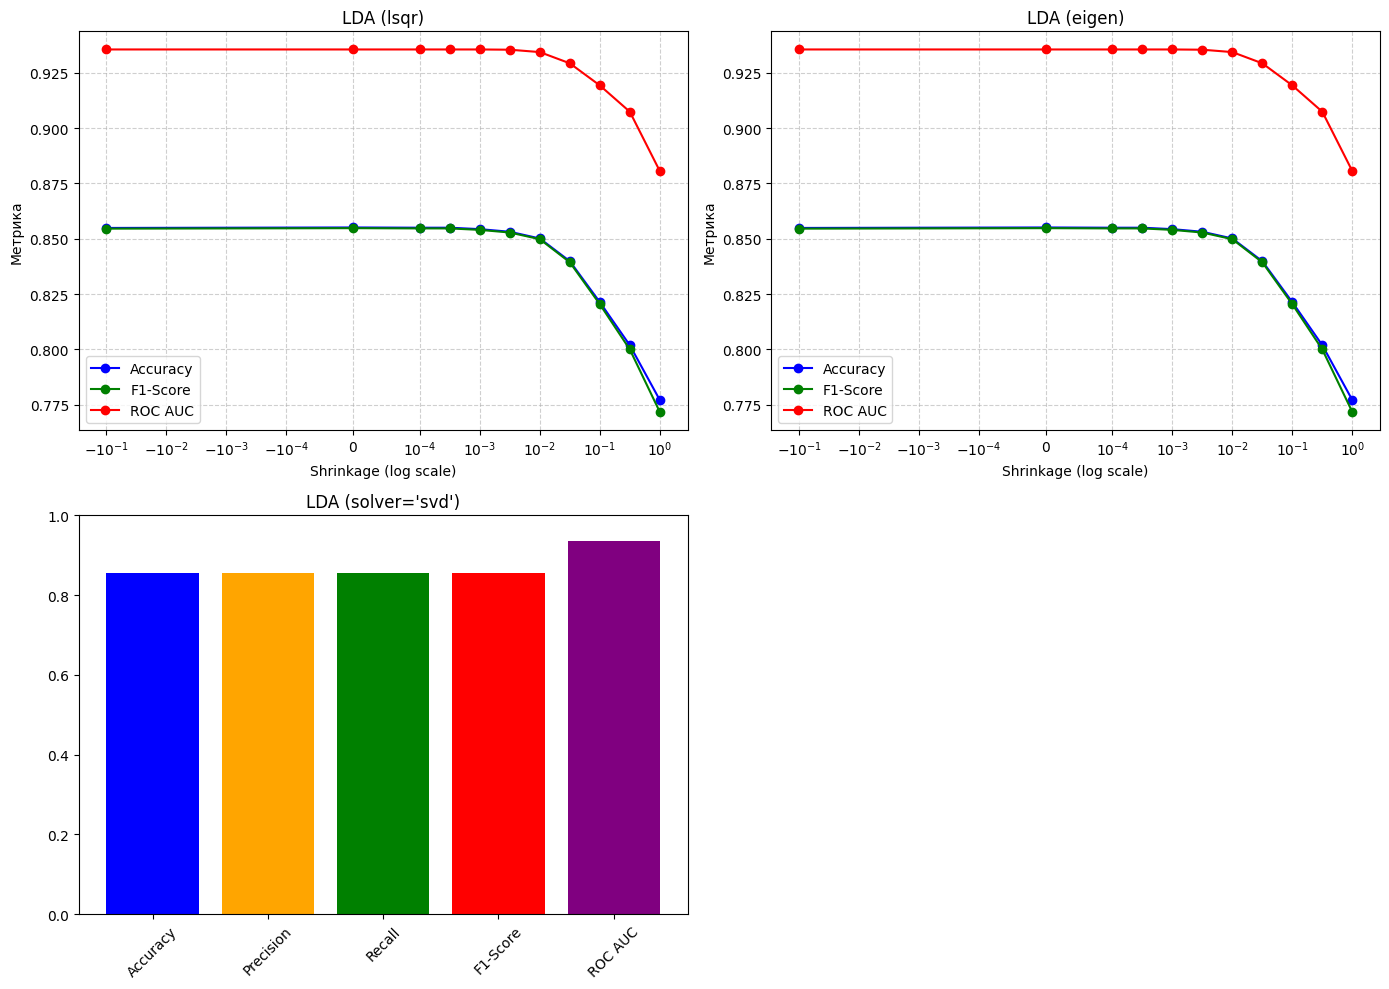

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = [
    {'solver': ['svd']},
    {'solver': ['lsqr'], 'shrinkage': [None, 'auto'] + list(np.logspace(-4, 0, 9))},
    {'solver': ['eigen'], 'shrinkage': [None, 'auto'] + list(np.logspace(-4, 0, 9))}
]

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

lda = LinearDiscriminantAnalysis()
clf = GridSearchCV(
    lda,
    param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

clf.fit(X_train, y_train)

results_df = pd.DataFrame(clf.cv_results_)
metric_cols = [
    'param_solver', 'param_shrinkage',
    'mean_test_accuracy',
    'mean_test_precision_macro',
    'mean_test_recall_macro',
    'mean_test_f1_macro',
    'mean_test_roc_auc_ovr'
]

results_summary = results_df[metric_cols].copy()
results_summary.columns = [
    'Solver', 'Shrinkage', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'
]
results_summary = results_summary.round(11)

print("\n=== Результаты GridSearch для LDA ===")
print(results_summary.to_string(index=False))

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1-Score': f1_score(y_test, y_pred, average='macro'),
    'ROC AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
}

print("\n=== Лучшие параметры ===")
print(clf.best_params_)

print("\n=== Метрики на тестовой выборке (лучшая модель) ===")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(14, 10))

for i, solver in enumerate(['lsqr', 'eigen'], 1):
    sub = results_summary[results_summary['Solver'] == solver]
    if sub.empty:
        continue

    sub = sub.copy()
    sub['Shrinkage_num'] = sub['Shrinkage'].apply(
        lambda x: float(x) if x not in [None, 'auto'] else (0 if x is None else -0.1)
    )


    sub = sub.sort_values('Shrinkage_num')

    plt.subplot(2, 2, i)
    for metric, color in zip(['Accuracy', 'F1-Score', 'ROC AUC'], ['blue', 'green', 'red']):
        plt.plot(sub['Shrinkage_num'], sub[metric], marker='o', label=metric, color=color)
    plt.xscale('symlog', linthresh=1e-4)
    plt.title(f'LDA ({solver})')
    plt.xlabel('Shrinkage (log scale)')
    plt.ylabel('Метрика')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.6)

svd_row = results_summary[results_summary['Solver'] == 'svd']
if not svd_row.empty:
    plt.subplot(2, 2, 3)
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
    values = svd_row.iloc[0][metrics].values
    plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title("LDA (solver='svd')")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Небольшое сжатие (shrinkage=0.0001–0.001) почти не влияет.
Увеличение shrinkage > 0.01 приводит к существенному падению качества.
Это говорит о том, что исходная ковариационная матрица хорошо обусловлена, и дополнительная регуляризация ухудшает модель.

### Метод опорных векторов
Метод опорных векторов (англ. SVM, support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа. Принадлежит семейству линейных классификаторов и может также рассматриваться как частный случай регуляризации по Тихонову. Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.

Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, обеспечивающая наибольшее расстояние до двух параллельных гиперплоскостей. Алгоритм основан на допущении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

![image](SVM.png)


=== Результаты GridSearch для SVM ===
Kernel      C Gamma  Accuracy  Precision   Recall  F1-Score  ROC AUC
linear   0.01   N/A  0.876840   0.877219 0.876840  0.876712 0.943557
linear   0.10   N/A  0.877814   0.878193 0.877814  0.877647 0.943408
linear   1.00   N/A  0.877056   0.877408 0.877056  0.876842 0.943271
linear  10.00   N/A  0.877056   0.877393 0.877056  0.876837 0.943294
linear 100.00   N/A  0.877165   0.877514 0.877165  0.876950 0.943284

=== Лучшие параметры ===
{'C': 0.1, 'kernel': 'linear'}

=== Метрики на тестовой выборке ===
Accuracy: 0.8755
Precision: 0.8755
Recall: 0.8755
F1-Score: 0.8753
ROC AUC: 0.9410


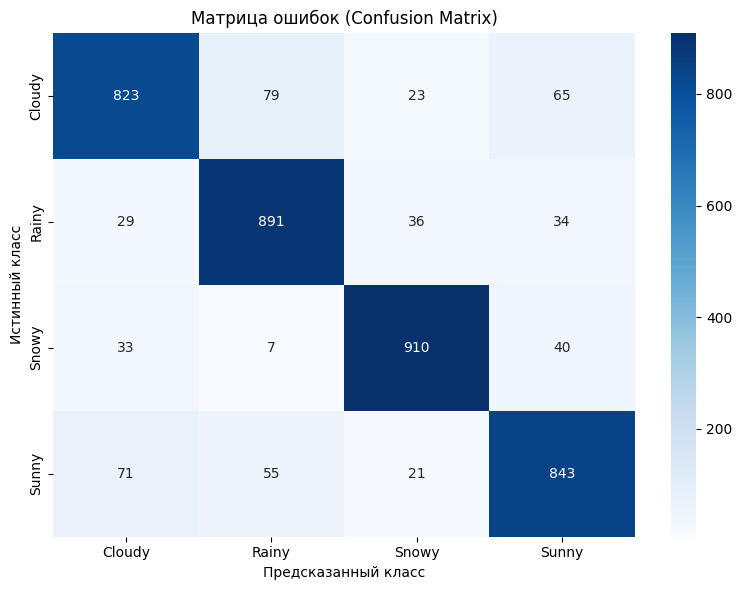


=== Classification Report ===
              precision    recall  f1-score   support

      Cloudy       0.86      0.83      0.85       990
       Rainy       0.86      0.90      0.88       990
       Snowy       0.92      0.92      0.92       990
       Sunny       0.86      0.85      0.85       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



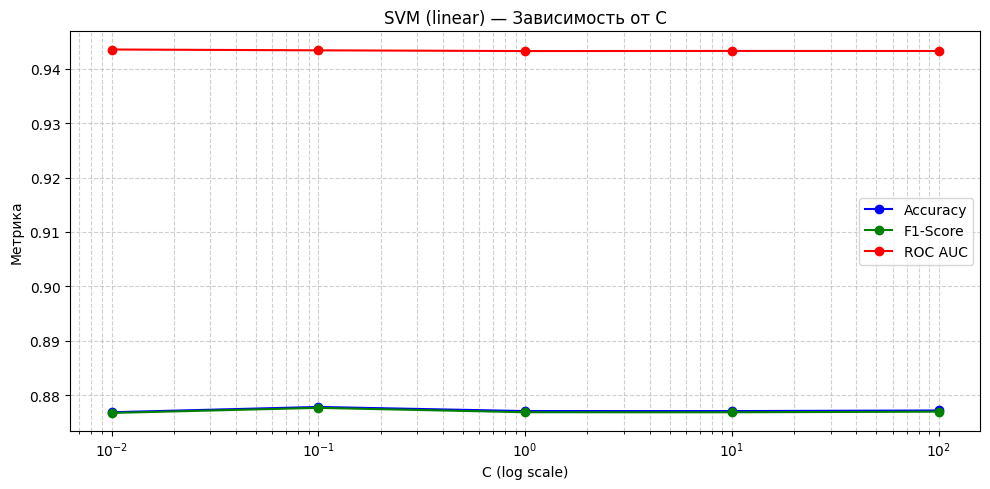

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    }
]

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

svm = SVC(probability=True, random_state=42)
clf = GridSearchCV(
    svm,
    param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

clf.fit(X_train_scaled, y_train)

results_df = pd.DataFrame(clf.cv_results_)
metric_cols = [
    'param_kernel', 'param_C',
    'mean_test_accuracy',
    'mean_test_precision_macro',
    'mean_test_recall_macro',
    'mean_test_f1_macro',
    'mean_test_roc_auc_ovr'
]

results_summary = results_df[metric_cols].copy()
results_summary['Gamma'] = 'N/A'
results_summary = results_summary.reindex(columns=[
    'param_kernel', 'param_C', 'Gamma',
    'mean_test_accuracy',
    'mean_test_precision_macro',
    'mean_test_recall_macro',
    'mean_test_f1_macro',
    'mean_test_roc_auc_ovr'
])
results_summary.columns = ['Kernel', 'C', 'Gamma', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
results_summary = results_summary.round(11)

print("\n=== Результаты GridSearch для SVM ===")
print(results_summary.to_string(index=False))

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1-Score': f1_score(y_test, y_pred, average='macro'),
    'ROC AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
}

print("\n=== Лучшие параметры ===")
print(clf.best_params_)
print("\n=== Метрики на тестовой выборке ===")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

subset = results_summary.copy()
subset = subset.sort_values('C')
plt.figure(figsize=(10, 5))
for metric, color in zip(['Accuracy', 'F1-Score', 'ROC AUC'], ['blue', 'green', 'red']):
    plt.plot(subset['C'], subset[metric], marker='o', label=metric, color=color)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Метрика')
plt.title(f'SVM (linear) — Зависимость от C')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

Модель SVM с линейным ядром показала стабильную и высокую точность (~87.5%) при различных значениях параметра регуляризации C. Наилучший результат на кросс-валидации достигнут при C = 0.1, однако различия между значениями C незначительны — это указывает на устойчивость модели к изменению регуляризации в данном диапазоне. Высокие и сбалансированные значения точности, полноты и F1-меры говорят об отсутствии явного перекоса в сторону какого-либо класса. ROC AUC ≈ 0.94 подтверждает хорошую способность модели разделять классы.
### Метод k-ближайших соседей
Метод k ближайших соседей (англ. k-nearest neighbors algorithm, k-NN) — метрический алгоритм для автоматической классификации объектов или регрессии.

В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по ближайшим к нему объектам, значения которых уже известны.

Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния; классический вариант такой функции — евклидова метрика

![image](k.png)


=== Лучшие 10 результатов GridSearch для k-NN ===
 k  Weights    Metric  Accuracy  Precision   Recall  F1-Score  ROC AUC
14  uniform manhattan  0.895996   0.896894 0.895996  0.896151 0.983518
15  uniform manhattan  0.895996   0.896750 0.895996  0.896138 0.983817
19  uniform manhattan  0.895996   0.896805 0.895996  0.896125 0.984665
 9  uniform manhattan  0.895779   0.896881 0.895779  0.896047 0.980525
18  uniform manhattan  0.895455   0.896289 0.895455  0.895603 0.984610
19 distance manhattan  0.895455   0.896047 0.895455  0.895498 0.984945
15 distance manhattan  0.895346   0.895805 0.895346  0.895362 0.984083
14 distance manhattan  0.895238   0.895756 0.895238  0.895265 0.983802
17  uniform manhattan  0.895022   0.895909 0.895022  0.895169 0.984371
13  uniform manhattan  0.895022   0.895996 0.895022  0.895229 0.983524

=== Лучшие параметры ===
{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

=== Метрики на тестовой выборке ===
Accuracy: 0.8932
Precision: 0.8943
Recal

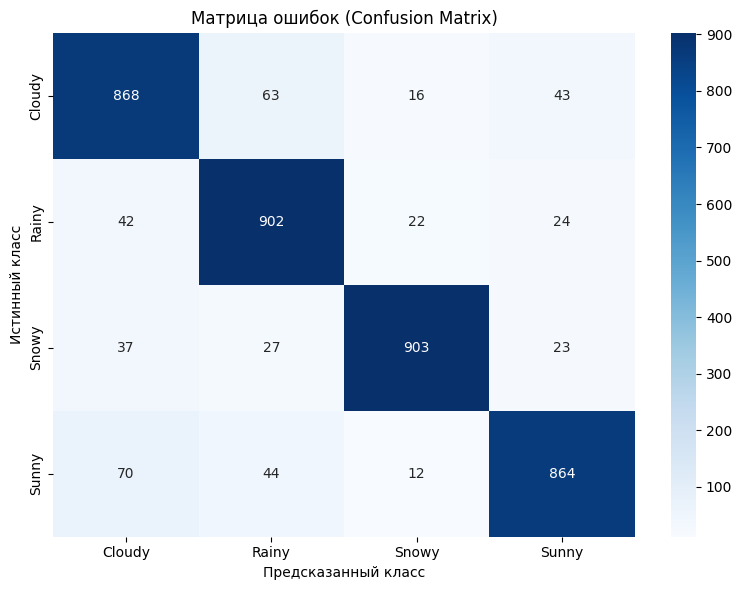


=== Classification Report ===
              precision    recall  f1-score   support

      Cloudy       0.85      0.88      0.86       990
       Rainy       0.87      0.91      0.89       990
       Snowy       0.95      0.91      0.93       990
       Sunny       0.91      0.87      0.89       990

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



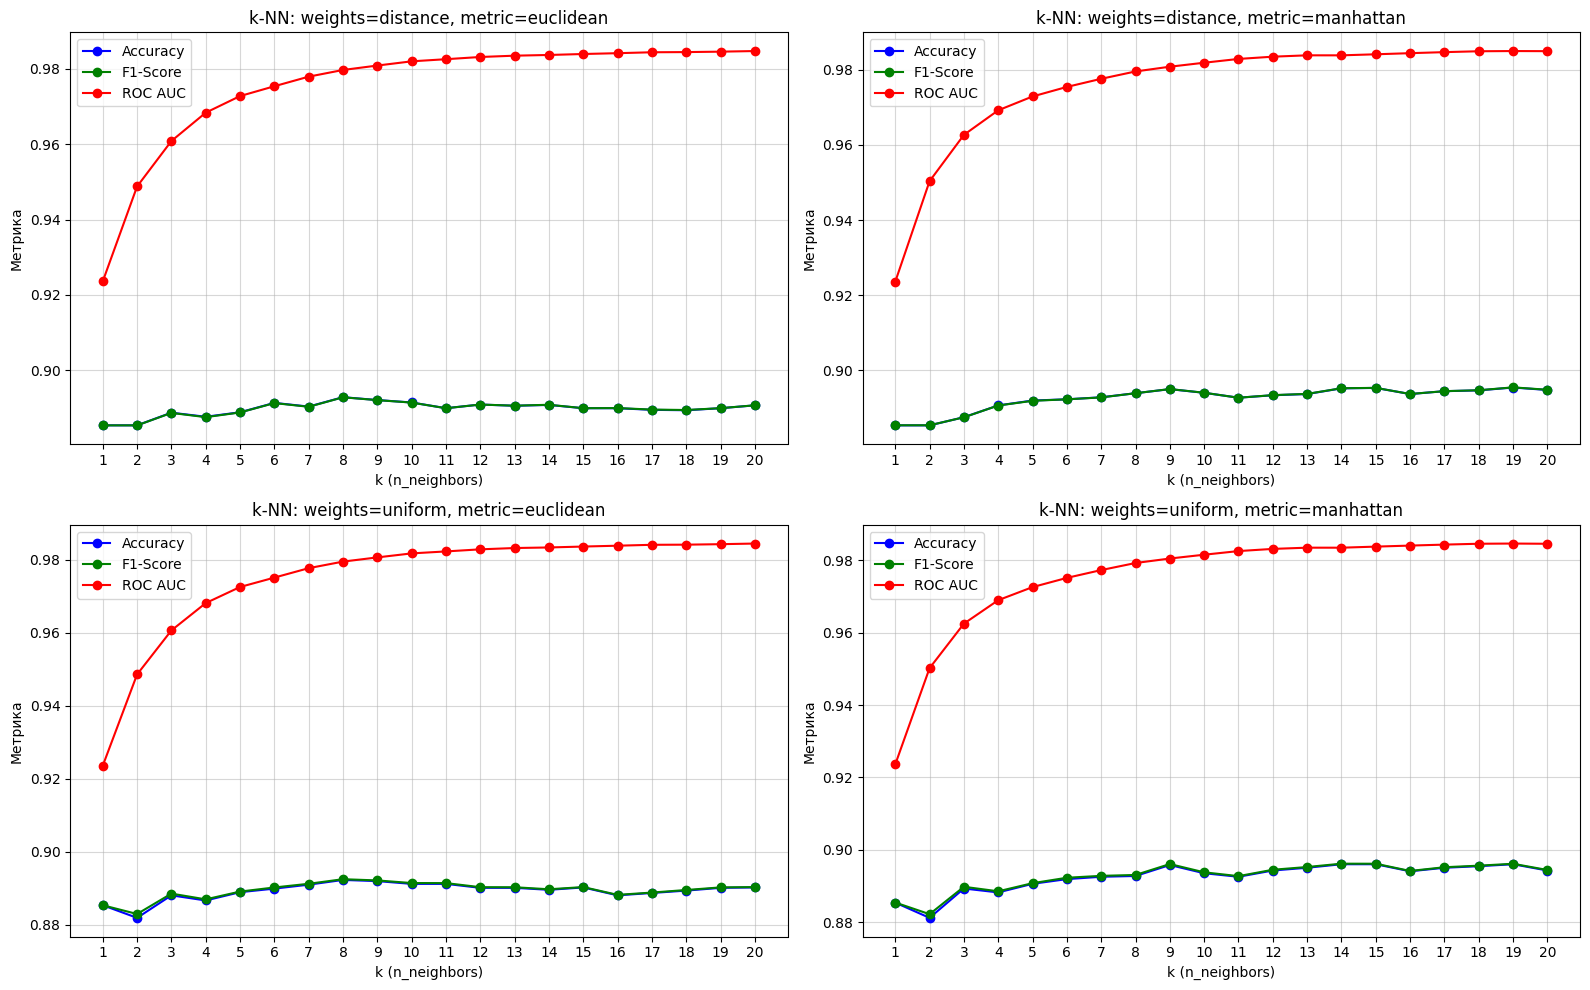

In [24]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = [
    {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
]

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

knn = KNeighborsClassifier()
clf = GridSearchCV(
    knn,
    param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

clf.fit(X_train_scaled, y_train)

results_df = pd.DataFrame(clf.cv_results_)
metric_cols = [
    'param_n_neighbors', 'param_weights', 'param_metric',
    'mean_test_accuracy',
    'mean_test_precision_macro',
    'mean_test_recall_macro',
    'mean_test_f1_macro',
    'mean_test_roc_auc_ovr'
]

results_summary = results_df[metric_cols].copy()
results_summary.columns = [
    'k', 'Weights', 'Metric', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'
]
results_summary = results_summary.round(11)

results_summary = results_summary.sort_values('Accuracy', ascending=False)

print("\n=== Лучшие 10 результатов GridSearch для k-NN ===")
print(results_summary.head(10).to_string(index=False))

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1-Score': f1_score(y_test, y_pred, average='macro'),
    'ROC AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
}

print("\n=== Лучшие параметры ===")
print(clf.best_params_)

print("\n=== Метрики на тестовой выборке ===")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(16, 10))
grouped = results_summary.groupby(['Weights', 'Metric'])

for idx, ((weight, metric), group) in enumerate(grouped, 1):
    ax = plt.subplot(2, 2, idx)
    group_sorted = group.sort_values('k')
    for metric_name, color in zip(['Accuracy', 'F1-Score', 'ROC AUC'], ['blue', 'green', 'red']):
        ax.plot(group_sorted['k'], group_sorted[metric_name], marker='o', label=metric_name, color=color)
    ax.set_title(f'k-NN: weights={weight}, metric={metric}')
    ax.set_xlabel('k (n_neighbors)')
    ax.set_ylabel('Метрика')
    ax.legend()
    ax.grid(True, alpha=0.5)
    ax.set_xticks(group_sorted['k'])

plt.tight_layout()
plt.show()

Модель k-NN с гиперпараметрами n_neighbors=14, weights='uniform' и metric='manhattan' продемонстрировала высокую точность (~89.3%) и отличное качество разделения классов (ROC AUC ≈ 0.985). Стабильные и сбалансированные метрики (precision ≈ recall ≈ F1) указывают на отсутствие систематической ошибки в пользу какого-либо класса.
При увелечение n_neighbors увеливается значение площади под прямой, что говорит об увелечение качества распознавание , но при этом при значение больше 8 точность распознавания незначительно уменьшается.

### Реализация нейронной сети на TensorFlow



--- Тестирование конфигурации 1: {'learning_rate': 0.001, 'dense1_units': 64, 'dropout_rate': 0.3, 'num_layers': 2} ---


d:\ML\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Тестовая точность: 0.9043, Тестовая потеря: 0.2096

--- Тестирование конфигурации 2: {'learning_rate': 0.001, 'dense1_units': 128, 'dropout_rate': 0.3, 'num_layers': 2} ---
Тестовая точность: 0.9061, Тестовая потеря: 0.2075

--- Тестирование конфигурации 3: {'learning_rate': 0.001, 'dense1_units': 64, 'dropout_rate': 0.5, 'num_layers': 3} ---
Тестовая точность: 0.9018, Тестовая потеря: 0.2254

--- Тестирование конфигурации 4: {'learning_rate': 0.01, 'dense1_units': 64, 'dropout_rate': 0.3, 'num_layers': 2} ---
Тестовая точность: 0.9030, Тестовая потеря: 0.2110

--- Результаты настройки гиперпараметров ---
   Run  Learning Rate  Dense1 Units  Dropout Rate  Num Layers  Test Accuracy  \
0    1          0.001            64           0.3           2       0.904293   
1    2          0.001           128           0.3           2       0.906061   
2    3          0.001            64           0.5           3       0.901768   
3    4          0.010            64           0.3           2      

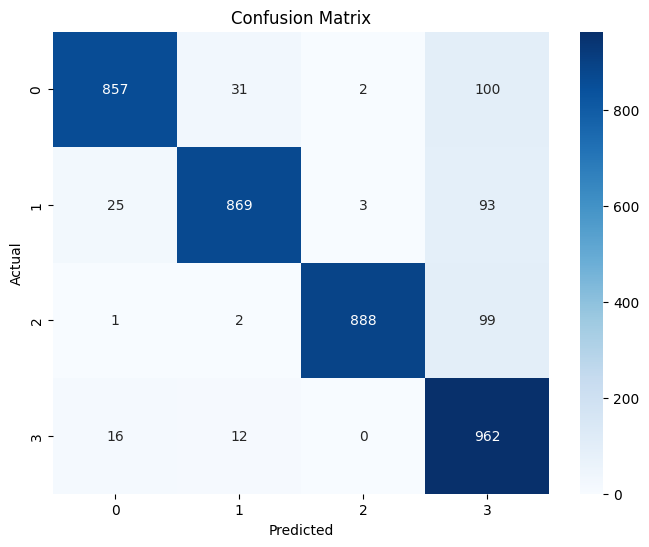

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os
from datetime import datetime

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

num_classes = len(np.unique(y_train_encoded))
y_train_cat = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_cat = keras.utils.to_categorical(y_test_encoded, num_classes)

def create_model(dense1_units=64, dropout_rate=0.3, learning_rate=0.001, num_layers=2):
    model = keras.Sequential()
    model.add(keras.layers.Dense(dense1_units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(keras.layers.Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(dense1_units, activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

hyperparams = [
    {'learning_rate': 0.001, 'dense1_units': 64, 'dropout_rate': 0.3, 'num_layers': 2},
    {'learning_rate': 0.001, 'dense1_units': 128, 'dropout_rate': 0.3, 'num_layers': 2},
    {'learning_rate': 0.001, 'dense1_units': 64, 'dropout_rate': 0.5, 'num_layers': 3},
    {'learning_rate': 0.01, 'dense1_units': 64, 'dropout_rate': 0.3, 'num_layers': 2},
]

log_dir = f"logs/{datetime.now().strftime('%Y%m%d_%H%M%S')}"
os.makedirs(log_dir, exist_ok=True)

results = []

for i, params in enumerate(hyperparams):
    print(f"\n--- Тестирование конфигурации {i+1}: {params} ---")

    run_log_dir = os.path.join(log_dir, f"run_{i+1}")
    tensorboard_callback = TensorBoard(
        log_dir=run_log_dir, 
        histogram_freq=1,
        write_graph=True,
        write_images=True
    )

    model = create_model(**params)

    history = model.fit(X_train, y_train_cat, 
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[tensorboard_callback],
                        verbose=0)

    
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0) 

    results.append({
        'Run': i+1,
        'Learning Rate': params['learning_rate'],
        'Dense1 Units': params['dense1_units'],
        'Dropout Rate': params['dropout_rate'],
        'Num Layers': params['num_layers'],
        'Test Accuracy': test_accuracy,
        'Test Loss': test_loss
    })

    print(f"Тестовая точность: {test_accuracy:.4f}, Тестовая потеря: {test_loss:.4f}")


results_df = pd.DataFrame(results)
print("\n--- Результаты настройки гиперпараметров ---")
print(results_df)

y_pred_cat = model.predict(X_test)
y_pred_labels = le.inverse_transform(np.argmax(y_pred_cat, axis=1))
y_test_labels = le.inverse_transform(np.argmax(y_test_cat, axis=1))

print("\n--- Отчет классификации ---")
print(classification_report(y_test_labels, y_pred_labels))

print("\n--- Матрица ошибок (Confusion Matrix) ---")
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

```
tensorboard --logdir logs/fit
```
Команда для запуска тензор флоу

![image](learn_hist.png)  

Наиболее стабильной и качественной моделью является Run 1, так как ее распределение смещений наиболее сконцентрировано вокруг нуля, что свидетельствует о минимальном систематическом смещении и хорошем качестве обучения.

Конфигурации Run 2 и Run 3 показывают ухудшение качества обучения: Run 2 — из-за возможного переобучения или смещения, Run 3 — из-за чрезмерного регуляризатора (Dropout).

Конфигурация Run 4 является наихудшей: слишком высокая скорость обучения приводит к нестабильному и неэффективному обучению.

![image](epoch.png)  
Самые сильные модели (оранжевый, синий, светло-голубой): Эти три кривые находятся в верхней части графика и демонстрируют самую высокую точность. Они достигают значения около 0.905-0.91 к концу обучения (эпоха 50). Это указывает на то, что эти конфигурации гиперпараметров являются наиболее эффективными для данной задачи.
Модель среднего уровня (зеленый, серый): Эти кривые занимают промежуточное положение. Их точность стабилизируется примерно на уровне 0.895-0.90. Они также обучаются хорошо, но не достигают пика производительности лучших моделей.
Самая слабая модель (розовый): Эта кривая находится ниже всех остальных. Ее точность растет медленнее и к концу обучения составляет около 0.892. Это свидетельствует о том, что соответствующая ей конфигурация гиперпараметров является наименее эффективной.

![image](epoch_loss.png)  
Самые сильные модели (оранжевый, синий, светло-голубой, зеленый): Эти кривые находятся в нижней части графика и демонстрируют самую низкую потерю. Они достигают значения около 0.2-0.22 к концу обучения (эпоха 50). Это указывает на то, что соответствующие им конфигурации гиперпараметров являются наиболее эффективными для данной задачи.
Модель среднего уровня (серый цвет): Эта кривая занимает промежуточное положение. Ее потеря стабилизируется примерно на уровне 0.24-0.26. Она также обучается хорошо, но не достигает пика производительности лучших моделей.
Самая слабая модель (розовый цвет): Эта кривая находится выше всех остальных. Ее потеря снижается

### Сравнение классификаторов
🔍 Анализ по метрикам
1. Accuracy (точность)
Лидеры: Дерево решений (0.9068) и нейросеть (0.9061).
Худшие: LDA (≈0.8576), Naive Bayes (0.8636).
2. Сбалансированные метрики (Precision, Recall, F1)
Все модели показывают близкие значения Precision и Recall  классы сбалансированы, и модели не склонны к систематическим ошибкам в одну сторону.
3. ROC AUC
Лидер по AUC: k-NN (0.9848) — показывает исключительную способность разделять классы, несмотря на немного меньшую точность.
Это означает, что у k-NN меньше ложных срабатываний/пропусков при варьировании порога, особенно полезно, если в будущем потребуется калибровка вероятностей.